In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('../dataset/digit-recognizer/train.csv')
test_df = pd.read_csv('../dataset/digit-recognizer/test.csv')

In [4]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
target = train_df.label
train = train_df.drop(columns = 'label')

In [7]:
print(target.shape)
print(train.shape)

(42000,)
(42000, 784)


In [8]:
del train_df

freeing some spaces

In [9]:
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression(max_iter = 2000).fit(train,target)

In [11]:
from sklearn.metrics import accuracy_score
predict = model.predict(train)
accuracy = accuracy_score(target,predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.95


<Axes: >

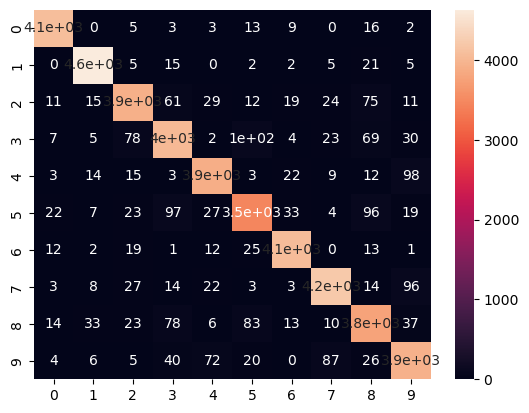

In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(target,predict)
sns.heatmap(cf,annot = True)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(predict,target))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4157
           1       0.99      0.98      0.98      4719
           2       0.94      0.95      0.94      4120
           3       0.93      0.93      0.93      4344
           4       0.96      0.96      0.96      4066
           5       0.91      0.93      0.92      3729
           6       0.98      0.97      0.98      4157
           7       0.96      0.96      0.96      4373
           8       0.93      0.92      0.92      4108
           9       0.94      0.93      0.93      4227

    accuracy                           0.95     42000
   macro avg       0.95      0.95      0.95     42000
weighted avg       0.95      0.95      0.95     42000



In [14]:
prediction = model.predict(test_df)

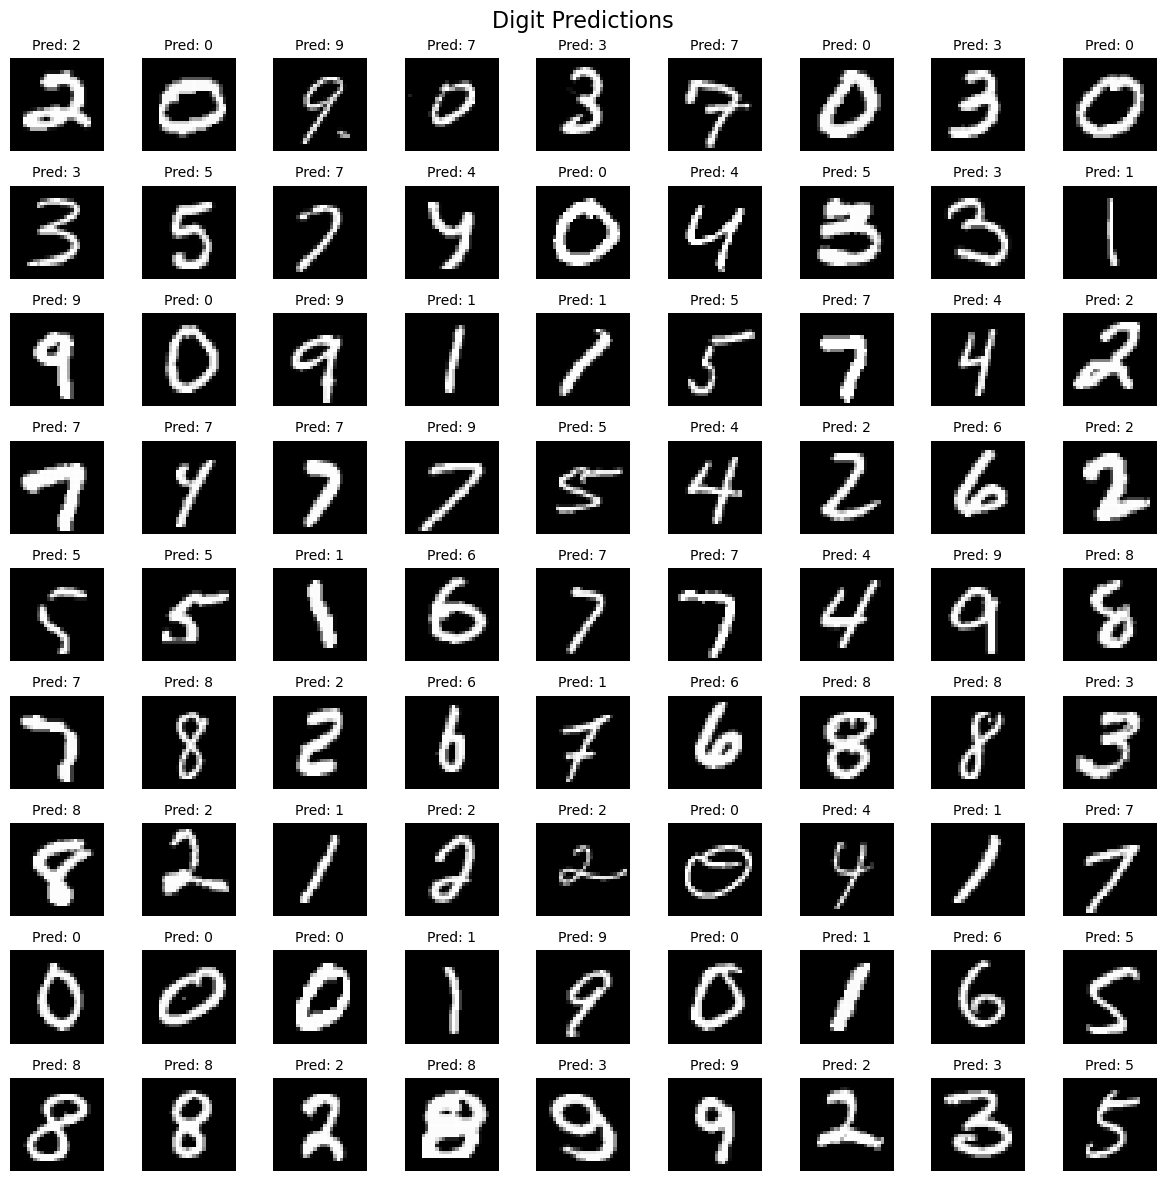

In [15]:
fig, axes = plt.subplots(9, 9, figsize=(12, 12))
fig.suptitle('Digit Predictions', fontsize=16)
for i in range(81):
    row = i // 9
    col = i % 9
    
    pixels = test_df.iloc[i].values.reshape(28, 28)
    
    axes[row, col].imshow(pixels, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Pred: {prediction[i]}', fontsize=10)

plt.tight_layout()
plt.show()